# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

**Цель:** закрепить знания о математическом смысле метрик TPR, FPR. Изучить построение ROC-кривой, графика Precision-Recall.

**Описание задания:**
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.

# 1. Преобразуйте данные:
a. Проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('athletes.csv')
data.head(3)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1


In [3]:
#проверим на пропуски
data.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [4]:
#удалим пропуски
data = data.dropna()

b. Закодируйте категориальные переменные числовыми значениями по необходимости.

In [5]:
#выберем признаки, по которым будем обучать модель
selectedColumns = data [['sex', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']]
# переведем категориальные признаки в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['sport'])
#удалим столбец с целевой переменной
del X['sex']
X.head(3)

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#целевая переменная - категориальная; переведем значения столбца в числа, оставив один столбец
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
le.fit(data['sex'])

LabelEncoder()

In [8]:
#записываем в таргетную переменную y преобразованный столбец
y = pd.Series(data = le.transform(data['sex']))
y.head(3)

0    1
1    0
2    1
dtype: int64

# 2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
#разбиваем данные на обучающую и тестовую выборки в соотношении 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
model = LogisticRegression()

In [14]:
#обучаем модель
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
#получаем прогнозные значения модели (переменная predictions)
predictions = model.predict_proba(X_test)

In [16]:
predictions[:2]

array([[0.14020747, 0.85979253],
       [0.62617609, 0.37382391]])

In [17]:
model.score(X_train, y_train)

0.8054340317752705

In [18]:
model.score(X_test, y_test)

0.7960405156537753

# 3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.

In [19]:
#посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [20]:
#получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [21]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9999954300119218)
(0.0, 0.0008561643835616438, 0.9999954300119218)
(0.0, 0.00684931506849315, 0.9999482386642554)
(0.00099601593625498, 0.00684931506849315, 0.999940933500932)
(0.00099601593625498, 0.008561643835616438, 0.9998437149694513)
(0.00199203187250996, 0.008561643835616438, 0.9998359015198875)
(0.00199203187250996, 0.014554794520547944, 0.9997363094201872)
(0.00298804780876494, 0.014554794520547944, 0.9997232211625823)
(0.00298804780876494, 0.029965753424657533, 0.9989966591954488)
(0.00398406374501992, 0.029965753424657533, 0.9989165172451228)


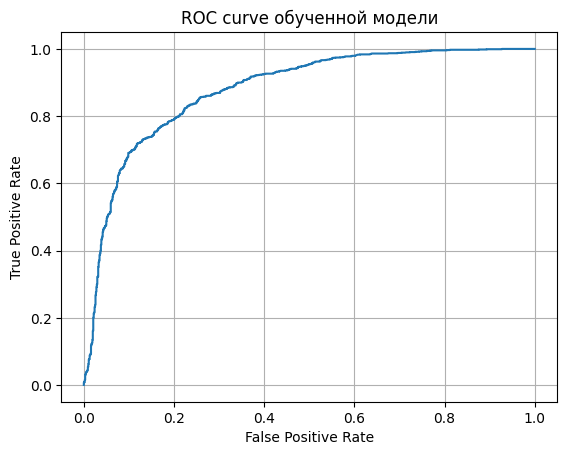

In [22]:
plt.plot(fpr, tpr)
plt.title("ROC curve обученной модели")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()

# 4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.

In [23]:
#вычислим значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score

In [24]:
roc_auc_score( y_test, predictions[:, 1] )

0.8787717281558697

# 5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [25]:
#реализуем подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn
tpr_hand = []
fpr_hand = []
for threshold in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba(X_test)
    for predicted_prob, actual in zip(y_pred[:,1], y_test):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr_hand.append(tp/(tp+fn))
    fpr_hand.append(fp/(fp+tn))

# 6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.

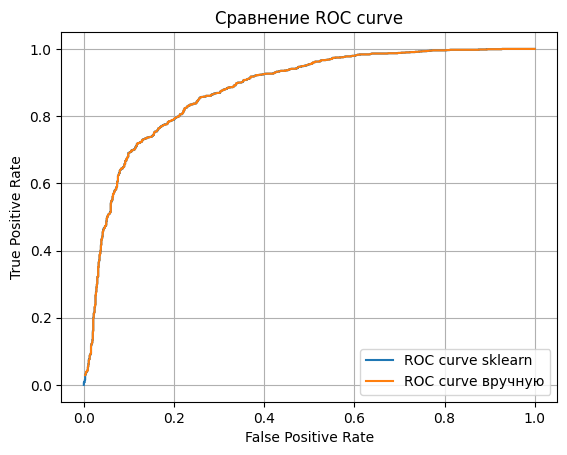

In [26]:
#построим на одном графике ROC-кривые, посчитанные с помощью sklearn и "вручную"
plt.plot(fpr, tpr, label='ROC curve sklearn')
plt.plot(fpr_hand, tpr_hand, label='ROC curve вручную')
plt.title("Сравнение ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()

# 7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.

In [27]:
#реализуем подсчет метрик Precision, Recall «вручную», без использования готовых функций из библиотеки sklearn

pr_hand = []
re_hand = []
for threshold in np.arange(0, 1, 0.001):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    y_pred = model.predict_proba(X_test)
    for predicted_prob, actual in zip(y_pred[:,1], y_test):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    pr_hand.append(tp/(tp+fp))
    re_hand.append(tp/(tp+fn))

Text(0, 0.5, 'Precision')

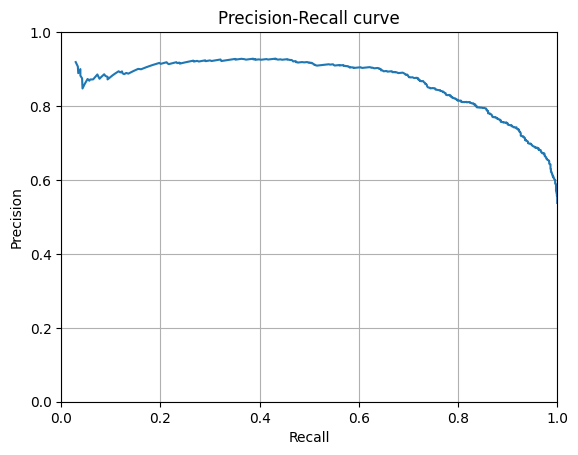

In [28]:
plt.plot(re_hand, pr_hand)
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

# 8. Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.

In [30]:
#вычислим значение ROC-AUC метрики, используя метрики, посчитанные "вручную"
from sklearn.metrics import auc

In [31]:
auc(fpr_hand, tpr_hand)

0.8787303696174207

# 9. Сформулируйте выводы по проделанной работе:
a. Как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?

b. Может ли ROC-кривая проходить ниже диагонали?

**ВЫВОД:**
- Для идеального классификатора график ROC-кривой проходит через верхний левый угол, где доля истинно положительных случаев составляет 100% или 1,0 (идеальная чувствительность), а доля ложно положительных примеров равна нулю. В нашем случае, ROC-кривая достаточно близка к верхнему левому углу, что говорит о хорошей предсказательной способности модели.
- Показатель AUC не содержит никакой информации о чувствительности и специфичности модели и предназначен скорее для сравнительного анализа нескольких моделей. Однако можно считать, что чем больше показатель AUC, тем лучшей прогностической силой обладает модель. В нашем случае, AUC находится в диапазоне (0.8; 0.9), что говорит об "очень хорошем" качестве модели.
- ROC кривая никогда ни в каких точках не проходит ниже диагонали и не пересекает диагональ (в пределе ROC, совпадающая с диагональю, означает бесполезный классификатор).